In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import glob
import os

In [2]:
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

# HeatMap Plotting

Normal example of creating of heatmap by 2 dimensional Array

In [3]:
var = np.linspace(1,10,20).reshape(5,4)
var

array([[ 1.        ,  1.47368421,  1.94736842,  2.42105263],
       [ 2.89473684,  3.36842105,  3.84210526,  4.31578947],
       [ 4.78947368,  5.26315789,  5.73684211,  6.21052632],
       [ 6.68421053,  7.15789474,  7.63157895,  8.10526316],
       [ 8.57894737,  9.05263158,  9.52631579, 10.        ]])

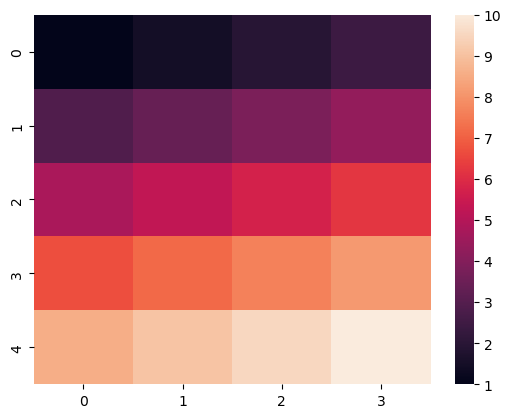

In [4]:
sns.heatmap(var)
plt.show()

In [5]:
new_dataset = sns.load_dataset("attention") 
x= new_dataset.drop(columns=["Unnamed: 0","attention"]).head(5)
x

,subject,solutions,score
0,1,1,2.0
1,2,1,3.0
2,3,1,3.0
3,4,1,5.0
4,5,1,4.0


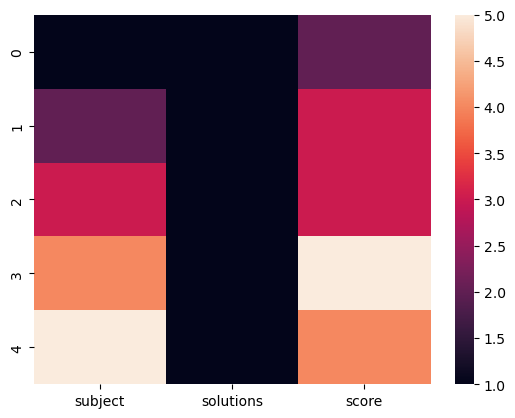

In [6]:
#distribution of data across each axis..this time we are trying to do make the heatmap from the dataset
sns.heatmap(x)
plt.show()

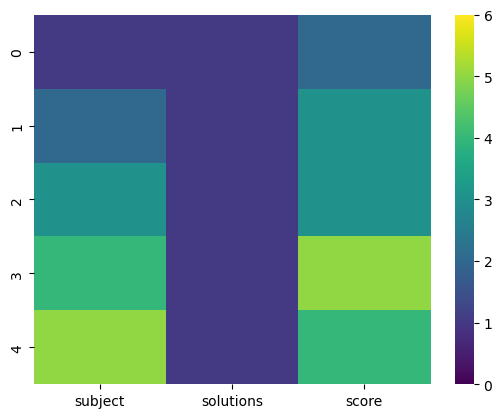

In [7]:
#vmin and vmax parameter to change the color range 
sns.heatmap(x,vmin=0,vmax=6,cmap="viridis")
plt.show()

In [8]:
flights = sns.load_dataset("flights")
y= flights.drop(columns="month",axis=1)
y

,year,passengers
0,1949,112
1,1949,118
2,1949,132
3,1949,129
4,1949,121
...,...,...
139,1960,606
140,1960,508
141,1960,461
142,1960,390


<Axes: >

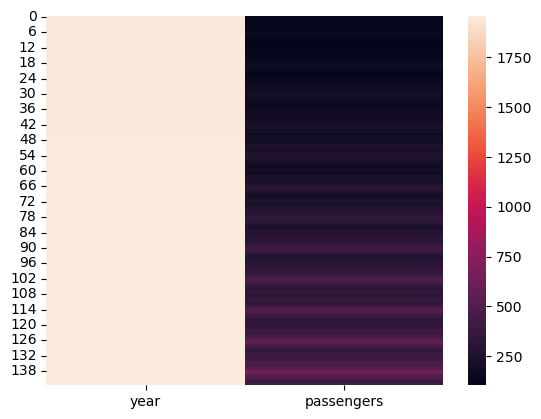

In [9]:
sns.heatmap(y)

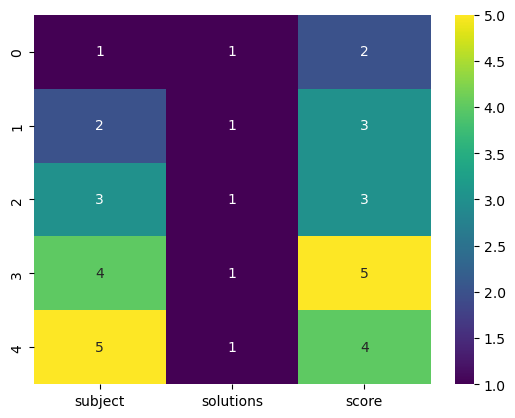

In [10]:
#Annot paramter to showcase the values on the heatmap
sns.heatmap(x,vmin=1,vmax=5,cmap="viridis",annot=True)
plt.show()

In [11]:
#this is to upgrade the version of seaborn to showcase the annotations for all the values
pip install seaborn --upgrade

SyntaxError: invalid syntax (858970206.py, line 2)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
#if you want to showcase your values on each columns then we can also do that
var_1 = np.linspace(1,10,10).reshape(2,5)
var_1

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.]])

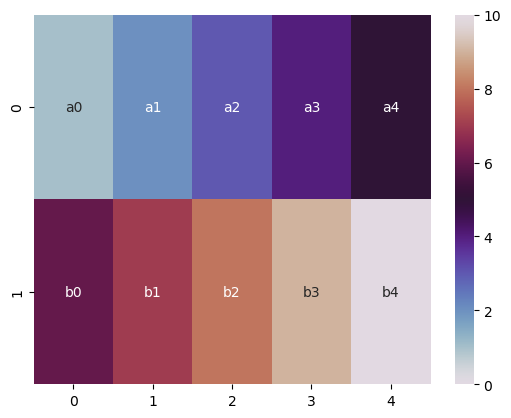

In [14]:
values = np.array([["a0","a1","a2","a3","a4"],["b0","b1","b2","b3","b4"]])
sns.heatmap(var_1,vmin=0,vmax=10,cmap="twilight",annot=values,fmt="s")
plt.show()

In [15]:
#NOW changing the font size and color of the data labels inside the heatmap

<Axes: >

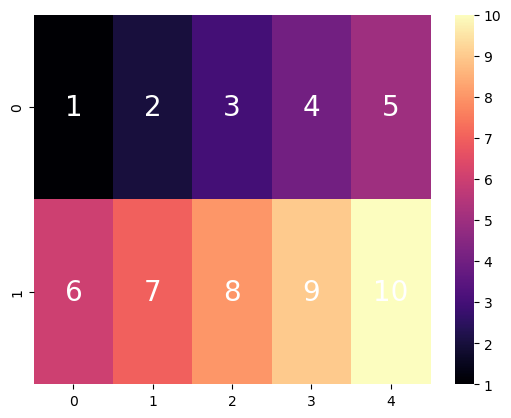

In [16]:
y={"fontsize":20,"color":"w"}
sns.heatmap(var_1,cmap="magma",annot=True,annot_kws=y)

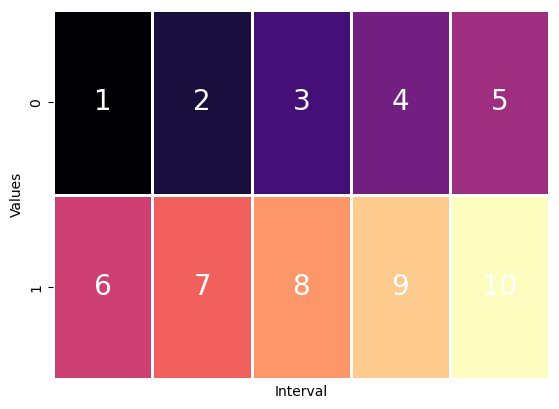

In [17]:
#Changing the gap between the columns and removing the color bar as well as removing the x and y labels
z= sns.heatmap(var_1,cmap="magma",annot=True,annot_kws=y,cbar=False,linewidth=2,xticklabels=False)
z.set(xlabel="Interval",ylabel="Values")
plt.show()

# Now working on some other dataset

In [20]:
os.getcwd()

'D:\\Business analytics\\Excel class\\Python\\HeatMap Plot Data'

In [21]:
os.chdir("D:/Business analytics/Excel class/Python/HeatMap Plot Data")
os.getcwd()

'D:\\Business analytics\\Excel class\\Python\\HeatMap Plot Data'

In [22]:
plot_data = pd.read_excel("mart_linePlot.xlsx")
plot_data.head()

,Unnamed: 0,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,Tier
0,0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,2
1,1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,1
2,2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,3
3,3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,1
4,4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,3


In [23]:
y = plot_data[["Outlet_Year","Outlet_Size","Sales"]]
y.head()

,Outlet_Year,Outlet_Size,Sales
0,2004,Small,2689.457781
1,1987,Small,3437.350375
2,1999,Small,3129.967268
3,1996,Small,1306.514376
4,1988,Small,1739.769829


In [27]:
# Now Re structure of the data like making particular columns into rows with column values that is called in matrix 
x = plot_data.pivot_table(index="Outlet_Year",columns= "Outlet_Size",values="Sales")
x


Outlet_Size,High,Medium,Small
Outlet_Year,,,
1987,2015.037160,1792.973492,1917.302712
1988,1695.209700,1444.865311,1641.739583
1996,2265.268983,2272.371502,2219.790139
1997,2029.428925,1826.732664,1903.967543
1998,2306.542273,2279.666103,2233.775392
1999,2004.082749,1850.282194,1909.920236
2003,2261.028030,2158.063891,2190.118601
2004,1966.898730,1826.582596,1889.009488
2005,1935.238262,1010.230431,1215.937098


In [28]:
# now just lower case the column names for better accessing the values
x.columns = x.columns.str.lower()
x

Outlet_Size,high,medium,small
Outlet_Year,,,
1987,2015.037160,1792.973492,1917.302712
1988,1695.209700,1444.865311,1641.739583
1996,2265.268983,2272.371502,2219.790139
1997,2029.428925,1826.732664,1903.967543
1998,2306.542273,2279.666103,2233.775392
1999,2004.082749,1850.282194,1909.920236
2003,2261.028030,2158.063891,2190.118601
2004,1966.898730,1826.582596,1889.009488
2005,1935.238262,1010.230431,1215.937098


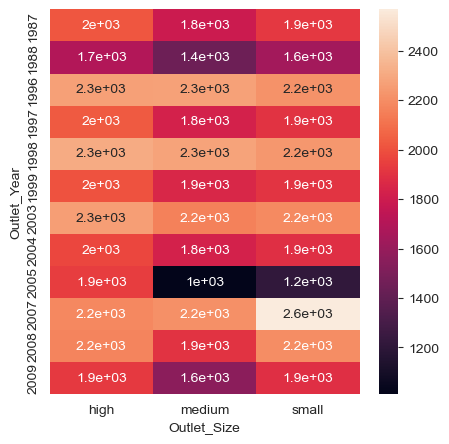

In [38]:
sns.set_style("white")
plt.figure(figsize=(5,5))
sns.heatmap(x,annot=True)
plt.show()

Now using of fmt paramter to change the floating values into no decimal values

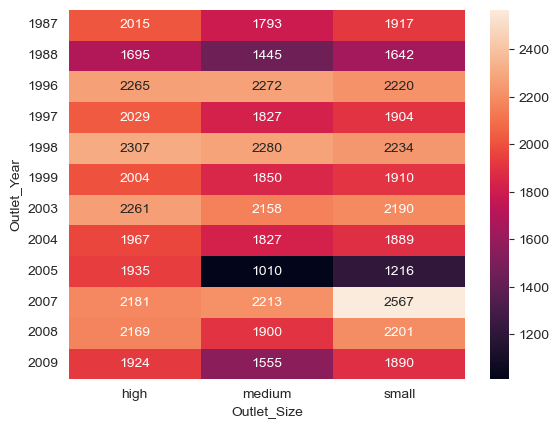

In [39]:
sns.heatmap(x,annot=True,fmt=".0f")
plt.show()
#here you can see the decimal values converted into integers and this is only done for heatmap not effect on dataframe

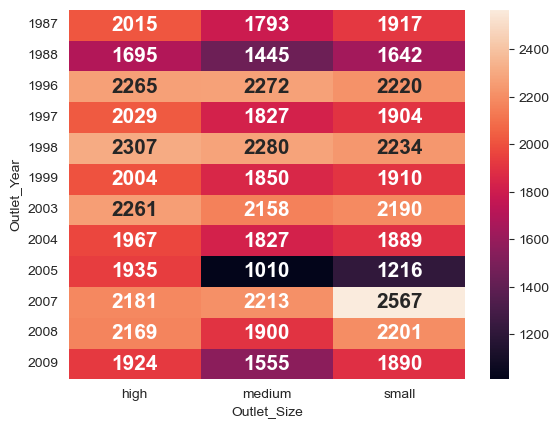

In [42]:
# Changing the data labels size as well as applying the styling of bold 
sns.heatmap(x,annot=True,fmt=".0f",annot_kws=dict(size=15,weight="bold"))
plt.show()

Now making the heatmap with correlation data

In [44]:
y = plot_data.drop(columns=["Unnamed: 0","Item_ID","Item_Type","Outlet_ID","Outlet_Size","Outlet_Location_Type"],axis=1)
y.head()

,Item_W,Item_MRP,Outlet_Year,Sales,Tier
0,21.027499,197.352319,2004,2689.457781,2
1,21.102371,148.250214,1987,3437.350375,1
2,20.882263,205.465010,1999,3129.967268,3
3,21.050435,253.417583,1996,1306.514376,1
4,21.247876,240.871039,1988,1739.769829,3


In [45]:
corr_data = y.corr()
corr_data

,Item_W,Item_MRP,Outlet_Year,Sales,Tier
Item_W,1.000000,-0.022830,0.009632,0.000615,0.036061
Item_MRP,-0.022830,1.000000,-0.009837,0.014813,-0.026039
Outlet_Year,0.009632,-0.009837,1.000000,-0.035701,0.184436
Sales,0.000615,0.014813,-0.035701,1.000000,-0.045660
Tier,0.036061,-0.026039,0.184436,-0.045660,1.000000


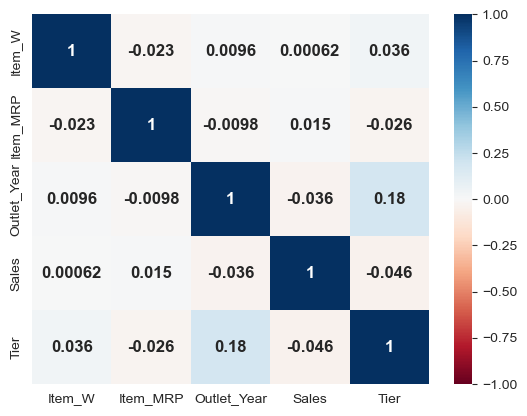

In [62]:
sns.set_style("white")
sns.heatmap(corr_data,vmin =-1,vmax=1,annot=True,cmap="RdBu",annot_kws=dict(size=12,weight="bold"))
plt.show()
#here we got the exact pattern how the each column is correlated to each other so that we got to know the variables depend

In [63]:
#lets plot the heatmap with other data set named flights
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [64]:
flights_data = flights.pivot_table(index="year",columns="month",values="passengers")
flights_data

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,191.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,274.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,306.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,347.0,305.0,336.0


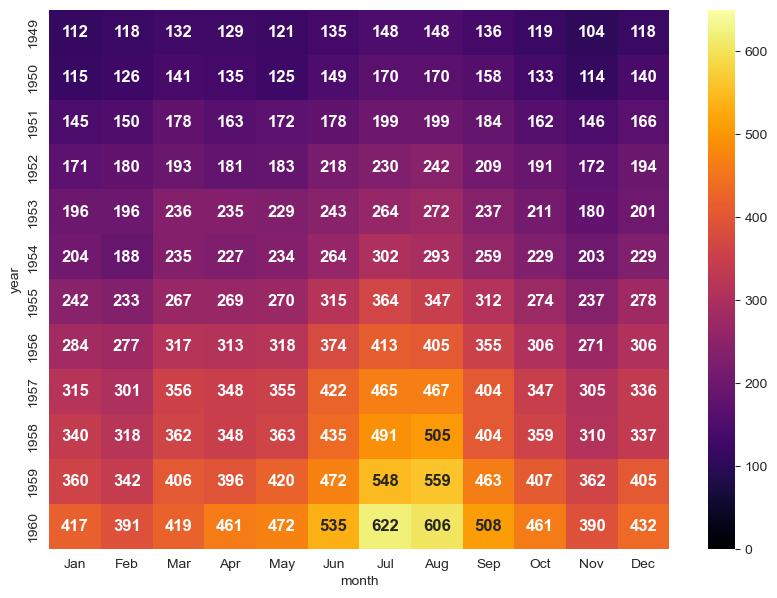

In [74]:
sns.set_style("white")
plt.figure(figsize=(10,7))
sns.heatmap(flights_data,annot=True,cmap="inferno",vmin=0,vmax=650,fmt=".0f",annot_kws=dict(size=12,weight="bold"))
plt.show()